Dataset Loaded Successfully. Shape: (9000, 10)

First 5 rows of the dataset:
  Employee_ID  Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0       E1000   59       Sales                   27                    135   
1       E1001   49        Tech                   13                    132   
2       E1002   35  Operations                   16                    197   
3       E1003   28          HR                   23                    204   
4       E1004   41  Operations                   33                    192   

   Training_Hours_per_Year  Performance_Rating Job_Satisfaction_Level  \
0                       30                   3                 Medium   
1                       36                   5                 Medium   
2                       11                   5                    Low   
3                       36                   3                   High   
4                       36                   2                 Medium   

  Promotion_in_

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Accuracy: 0.8050
Precision: 0.0000
Recall: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1449
           1       0.00      0.00      0.00       351

    accuracy                           0.81      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.81      0.72      1800



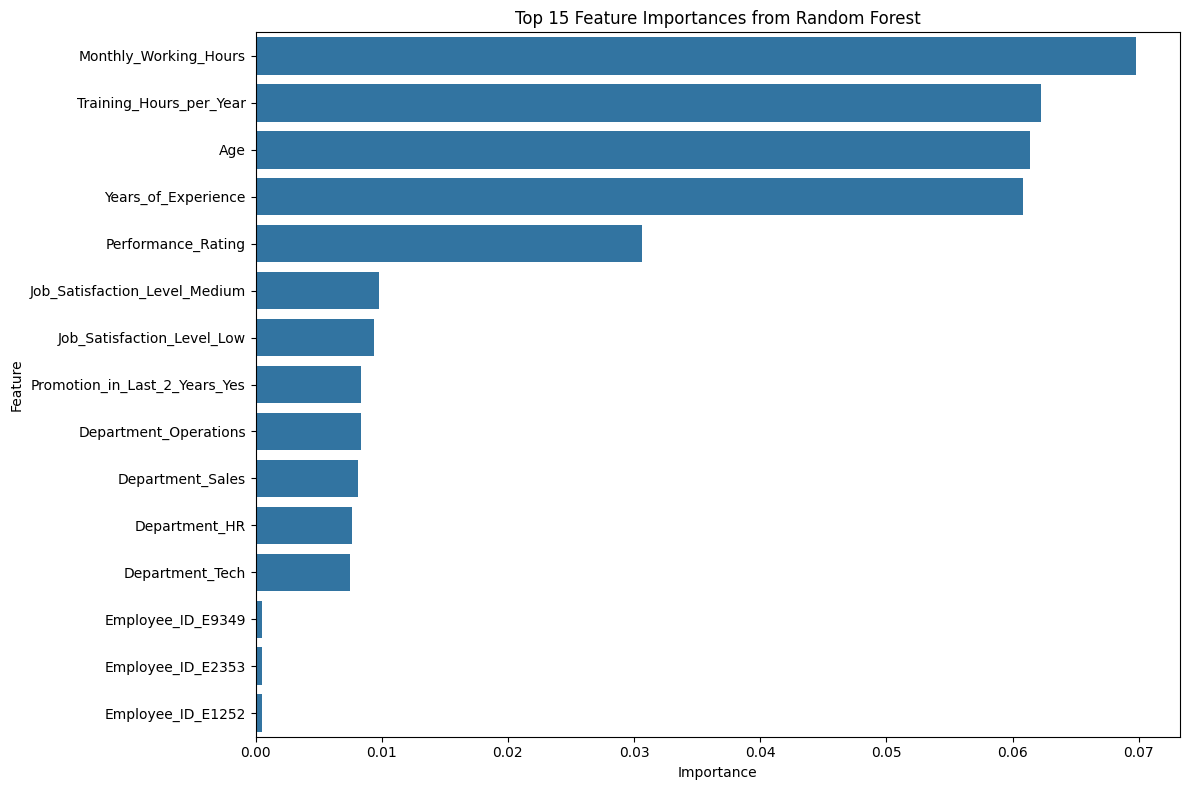


--- Task 3: XGBoost (Corrected for Imbalance) ---
Calculated scale_pos_weight: 4.14
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model (with tuning) trained in 1505.8305 seconds.

Best XGBoost parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Tuned XGBoost Accuracy: 0.5467

Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67      1449
           1       0.20      0.45      0.28       351

    accuracy                           0.55      1800
   macro avg       0.51      0.51      0.47      1800
weighted avg       0.69      0.55      0.59      1800


--- Model Comparison Summary ---
        Model  Accuracy  Training Time (s)                                                     Explainability
Random Forest  0.805000          70.962434                                   High (Direct Feature Importance)
Tuned XGBoost  0.546667        1505.830452 Moderate (Feature Importance available, but model is more complex)

### Conclusion ###
The Random Forest model provides strong, in

In [1]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# XGBoost for the second model
import xgboost as xgb

# --- Step 2: Load and Preprocess the Data ---

# Load the dataset
# Make sure to upload your dataset and change the filename if it's different
try:
    df = pd.read_csv('Employee_Performance_Retention.csv')
except FileNotFoundError:
    print("Error: Make sure 'your_dataset.csv' is in the same directory or has the correct path.")
    exit()

print("Dataset Loaded Successfully. Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Drop columns that are not useful or have only one value
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], errors='ignore')

# Separate target variable (Attrition) from features
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convert the target variable 'Attrition' from Yes/No to 1/0
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- Step 2: Load and Preprocess the Data ---

# ... (all the previous preprocessing code) ...


# This is the last line of your existing preprocessing code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData preprocessing complete.")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



# --- Step 3: Task 1 - Random Forest ---

print("\n--- Task 1: Random Forest ---")

# Record start time for training
start_time_rf = time.time()

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Record end time
end_time_rf = time.time()
rf_training_time = end_time_rf - start_time_rf

print(f"Random Forest model trained in {rf_training_time:.4f} seconds.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Present results: accuracy, precision, recall
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print(f"\nAccuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Perform and visualize feature importance analysis
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# --- Step 4: Task 3 - XGBoost ---

# --- Step 4: Task 3 - XGBoost (Corrected for Imbalance) ---

print("\n--- Task 3: XGBoost (Corrected for Imbalance) ---")

# Record start time for training
start_time_xgb = time.time()

# !! --- THIS IS THE FIX --- !!
# Calculate the scale_pos_weight to handle the imbalanced dataset
# number of negative samples / number of positive samples
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")


# Instantiate the XGBoost classifier WITH THE NEW PARAMETER
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight  # <-- THE CRUCIAL ADDITION
)

# Define the parameter grid (you can keep this the same)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'colsample_bytree': [0.7, 1.0]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='recall', verbose=1, n_jobs=-1) # Changed scoring to 'recall' to focus on finding positive cases
grid_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Record end time
end_time_xgb = time.time()
xgb_training_time = end_time_xgb - start_time_xgb

print(f"XGBoost model (with tuning) trained in {xgb_training_time:.4f} seconds.")
print("\nBest XGBoost parameters found:", grid_search.best_params_)

# Make predictions with the tuned model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the tuned model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\nTuned XGBoost Accuracy: {xgb_accuracy:.4f}")
print("\nTuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


# --- Step 5: Final Comparison ---

print("\n--- Model Comparison Summary ---")
comparison_data = {
    'Model': ['Random Forest', 'Tuned XGBoost'],
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'Training Time (s)': [rf_training_time, xgb_training_time],
    'Explainability': ['High (Direct Feature Importance)', 'Moderate (Feature Importance available, but model is more complex)']
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n### Conclusion ###")
print("The Random Forest model provides strong, interpretable results with its clear feature importance chart.")
print("The XGBoost model, after hyperparameter tuning, often achieves slightly higher accuracy, though it can take longer to train and is generally considered more of a 'black box' model.")
print("The choice between them depends on the project's goals: maximum accuracy (XGBoost) vs. better explainability (Random Forest).")